In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_flat+slowincrease'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

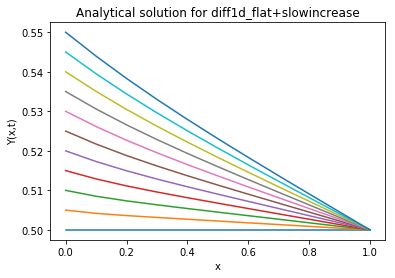

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
# plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## CG (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'CG'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.002713
         Iterations: 3246
         Function evaluations: 7365
         Gradient evaluations: 7365
17min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 0.0027131437865312268
     jac: array([-2.99103451e-06,  3.43947091e-06, -2.70395805e-06,  8.00517911e-07,
        3.57121089e-06,  7.97947533e-06, -5.41552929e-07, -7.69262891e-08,
       -3.49731639e-06,  5.93097202e-06, -1.77314899e-06, -1.65407497e-06,
        8.77934323e-06, -1.38727775e-06, -2.65202202e-06,  6.54034997e-06,
        1.11674341e-06, -3.47609810e-07, -9.81209128e-06,  8.15987963e-07,
        2.00348467e-06, -4.07122772e-07,  3.98764004e-06,  1.65103649e-06,
       -6.20940754e-06,  7.88258396e-06, -1.27505949e-06, -1.26629428e-08,
        4.99678975e-06,  8.87489813e-07,  4.75667254e-06, -2.85885110e-06,
        1.53442208e-06,  3.57814147e-06,  1.54730020e-06, -1.51465704e-06,
       -2.23009250e-06,  1.87743103e-0

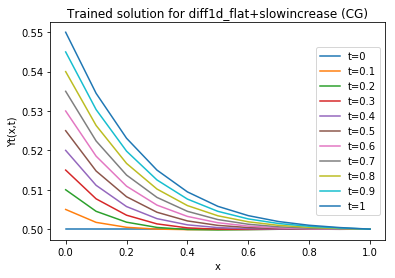

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

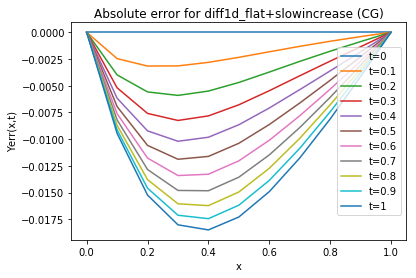

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

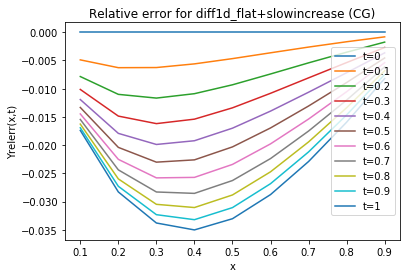

In [9]:
Yrelerr1 = (Yt1[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [ ]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

In [ ]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

In [ ]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

In [ ]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-8)

In [ ]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

In [ ]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

In [ ]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

In [ ]:
Yrelerr3 = (Yt3[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-8, maxiter=16000)

In [ ]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 16000
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

In [ ]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

In [ ]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

In [ ]:
Yrelerr4 = (Yt4[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));